# PREPROCESSING

### Definizione del path al file di interesse ed importazione delle librerie 

In [38]:
# Importo le librerie necessarie per il preprocessing
import numpy as np
import os
import pandas as pd
import mne

from mne.preprocessing import ICA

In [39]:
# Indico con una stringa di testo la cartella in cui sono memorizzati gli EEG
# --> home_path = os.path.abspath(os.getcwd())
# getcdw() prende la directory corrente, in cui il codice viene eseguito
# os.path --> path module for local paths 
# os.path.abspath --> returns a normalized absolutized version of the pathname path, 
#this method returns the pathname to the path passed as a parameter to this function.

#oppure

home_path="C:\\Users\\Isabel\\Desktop\\dataset_EEG" # il \ corrisponde a \\ in python
print(home_path)

C:\Users\Isabel\Desktop\dataset_EEG


### Scelta del paziente da analizzare

Definisco il "filename" tramite una somma di stringhe 

In [40]:
lista_filename = []
for i in range(1,51,1):
    paziente = i # assegno a paziente l'i-esimo della lista
    
    if paziente<10: # per i pazienti numerati sotto al 10 trovo il nome del file come somma del home_path, della stringa "\sub-0" e della stringa del numero del paziente in analisi
    # str(paziente) converte il numero 4 del paziente in una stringa
            filename = home_path+"\\sub-0"+str(paziente)+"\\eeg\\sub-0"+str(paziente)+"_task-rsvp_eeg.vhdr"
    if paziente >= 10:
            filename = home_path+"\\sub-"+str(paziente)+"\\eeg\\sub-"+str(paziente)+"_task-rsvp_eeg.vhdr"
    lista_filename.append(filename)
print(lista_filename)


['C:\\Users\\Isabel\\Desktop\\dataset_EEG\\sub-01\\eeg\\sub-01_task-rsvp_eeg.vhdr', 'C:\\Users\\Isabel\\Desktop\\dataset_EEG\\sub-02\\eeg\\sub-02_task-rsvp_eeg.vhdr', 'C:\\Users\\Isabel\\Desktop\\dataset_EEG\\sub-03\\eeg\\sub-03_task-rsvp_eeg.vhdr', 'C:\\Users\\Isabel\\Desktop\\dataset_EEG\\sub-04\\eeg\\sub-04_task-rsvp_eeg.vhdr', 'C:\\Users\\Isabel\\Desktop\\dataset_EEG\\sub-05\\eeg\\sub-05_task-rsvp_eeg.vhdr', 'C:\\Users\\Isabel\\Desktop\\dataset_EEG\\sub-06\\eeg\\sub-06_task-rsvp_eeg.vhdr', 'C:\\Users\\Isabel\\Desktop\\dataset_EEG\\sub-07\\eeg\\sub-07_task-rsvp_eeg.vhdr', 'C:\\Users\\Isabel\\Desktop\\dataset_EEG\\sub-08\\eeg\\sub-08_task-rsvp_eeg.vhdr', 'C:\\Users\\Isabel\\Desktop\\dataset_EEG\\sub-09\\eeg\\sub-09_task-rsvp_eeg.vhdr', 'C:\\Users\\Isabel\\Desktop\\dataset_EEG\\sub-10\\eeg\\sub-10_task-rsvp_eeg.vhdr', 'C:\\Users\\Isabel\\Desktop\\dataset_EEG\\sub-11\\eeg\\sub-11_task-rsvp_eeg.vhdr', 'C:\\Users\\Isabel\\Desktop\\dataset_EEG\\sub-12\\eeg\\sub-12_task-rsvp_eeg.vhdr', 'C:

Importo l'EEG di interesse

In [41]:
# In ingresso alla funzione read_raw_brainvision viene dato il percorso al file EEG a cui vogliamo accedere, 
# preload = True consente di pre-caricare i dati in memoria. 
# Se preload è una stringa, viene indicato dove memorizzare i dati
filename = lista_filename[0]
raw=mne.io.read_raw_brainvision(filename, preload=True)

Extracting parameters from C:\Users\Isabel\Desktop\dataset_EEG\sub-01\eeg\sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 3035739  =      0.000 ...  3035.739 secs...


In [5]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.0 Hz
 lowpass: 280.0 Hz
 meas_date: 2019-02-22 14:39:19 UTC
 nchan: 63
 projs: []
 sfreq: 1000.0 Hz
>

Costruisco il plot dell'EEG estratto

In [ ]:
#Plot di 3 secondi di 10 canali dell'EEG, 
# An electrode capturing brainwave activity is called an EEG channel

raw.plot(duration = 3, n_channels = 10, block = True)

Using qt as 2D backend.


Plot della Power Spectral Density

Effective window size : 0.256 (s)


C:\Users\Isabel\anaconda3\envs\TESI\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


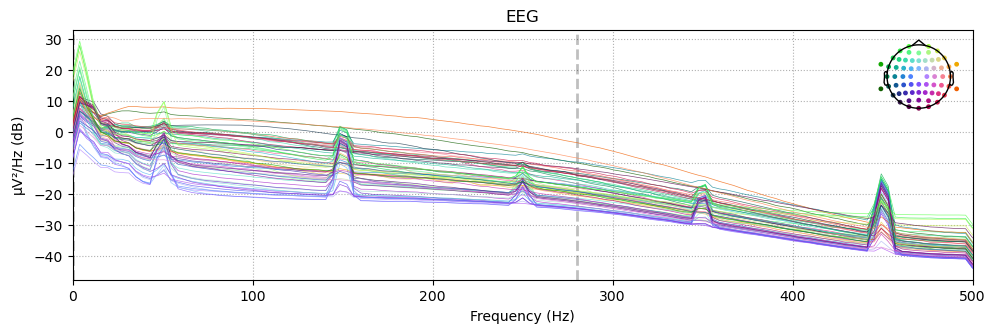

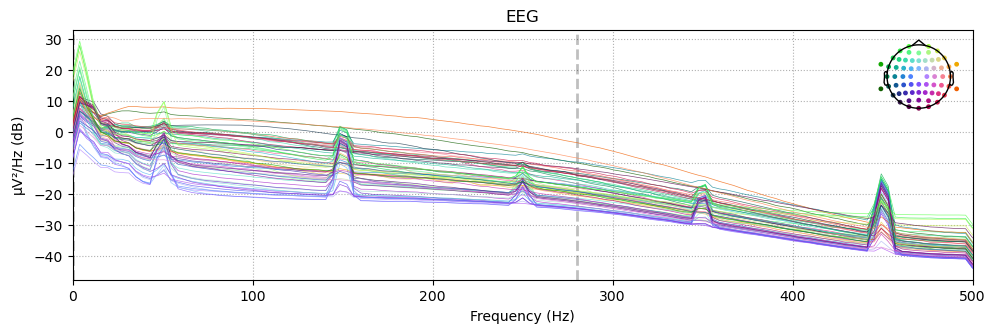

In [6]:
# Plot della Power Spectral Density dei canali
# PSD is used as a feature extraction method, it's a common signal processing technique that distributes the signal power over frequency 
# and shows the strength of the energy as function of frequency

raw.compute_psd().plot()

### Filtraggio

In [42]:
# Applico un filtro FIR tra 0.1 e 12 Hz per isolare le frequenze rilevanti
# banda passante = [0.1 - 12] Hz
# Per un filtro FIR passa-banda sono date in ingresso le frequenze (alta e bassa) che delimitano la banda
# method = 'fir' consente di specificare il tipo di filtro desiderato ('elapsed'=trascorso) 

filtro=raw.filter(0.1, 12, method='fir')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   22.3s finished


Effective window size : 0.256 (s)


C:\Users\Isabel\anaconda3\envs\TESI\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


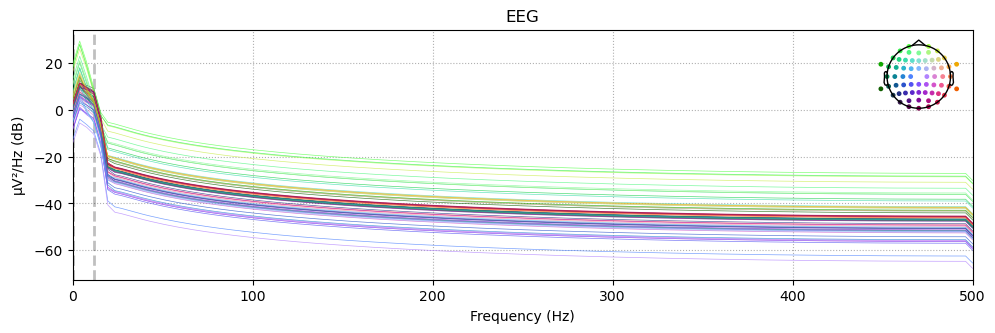

In [8]:
# Rappresento la PSD dopo aver filtrato l'EEG, rimane energia in corrispondenza della banda individuata dal filtro
# La linea tratteggiata verticale indica la frequenza di cutoff del filtro (in questo caso due essendo passa-banda)

filtro.compute_psd().plot()

In [43]:
# Costruisco il canale EEG di riferimento, a partire dal segnale filtrato
# set_eeg_reference: convenience function for creating an EEG reference.
# Il riferimento può essere un canale individuato da uno specifico elettrodo oppure un canale virtuale che è stato creato. 
# ref_channels can be names or name of the electrodes used to create the reference or 'average' to apply an average reference (default) 

reference=filtro.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Effective window size : 1.024 (s)


C:\Users\Isabel\anaconda3\envs\TESI\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


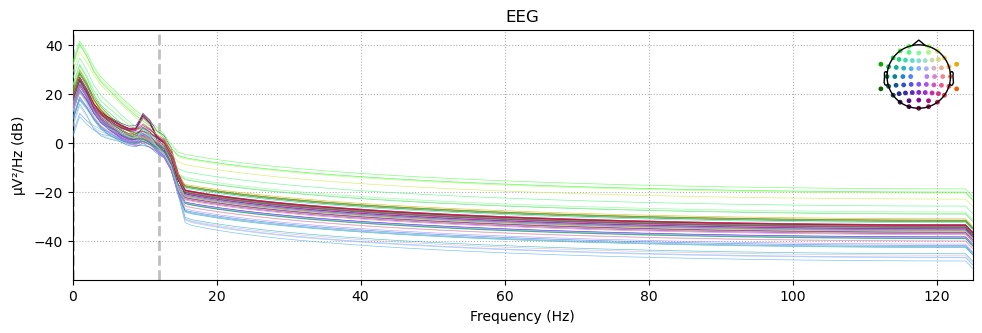

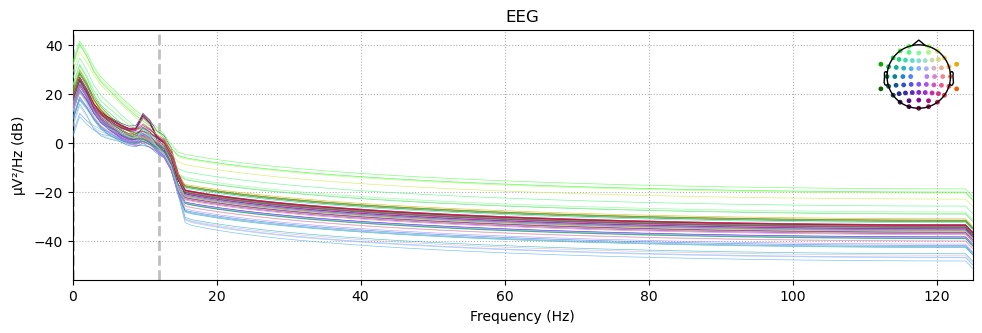

In [44]:
#Il dataset ha un sample ratio di 1000 Hz, che è troppo alto, quindi faccio un resampling e lo porto a 250 Hz
# in modo da velocizzare l'analisi
# copy() -->Return copy of Raw instance.
# I metodi di 'resampling' applicano in automatico un filtro passa-basso per evitare il fenomeno di aliasing.
# Il dato viene ri-campionato ad una nuova frequenza di campionamento indicata con sfreq
# Dal grafico si osserva che il numero di frequenze visibili sull'asse x è aumentato

resample=reference.copy().resample(sfreq=250)
resample.compute_psd().plot()

Setting up band-stop filter from 9.5 - 11 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 9.47
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 9.22 Hz)
- Upper passband edge: 10.53 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 10.78 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    1.7s finished


Effective window size : 1.024 (s)


C:\Users\Isabel\anaconda3\envs\TESI\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


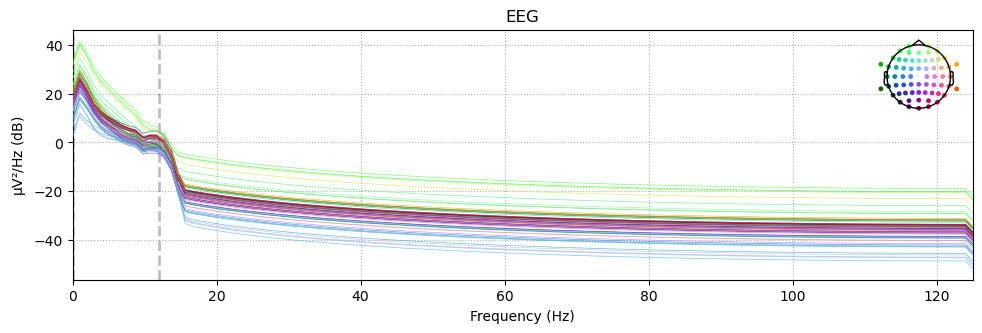

In [45]:
# Si può applicare un filtro notch (filtro elimina-banda/blocca-banda molto stretto) in particolare se si desidera rimuovere il powerline noise
#Il filtro consente di eliminare una specifica frequenza oppure un range di frequenze, indicate con il parametro 'freqs'

notch=resample.copy().notch_filter(freqs=10)
notch.compute_psd().plot()

In [ ]:
# Creo un ciclo for per memorizzare i dati filtrati di ciascun paziente in file .fif
for i in range(1,51,1):
    filename = lista_filename[i-1]
    raw=mne.io.read_raw_brainvision(filename, preload=True)
    paziente_filtrato = raw.filter(0.1, 12, method = 'fir')
    
    reference=paziente_filtrato.set_eeg_reference(ref_channels='average')
    
    resample=reference.copy().resample(sfreq=250)
    
    notch=resample.copy().notch_filter(freqs=10)
    
    notch.save('paziente_filtrato_'+str(i)+'.fif')

## ICA - Independent Component Analysis

In [46]:
#Per utilizzare l'ICA è consigliato applicare un filtro passa-alto di 1 Hz, per rimuovere in particolare low-frequency drifts che possono impattare negativamente il fit dell'ICA
# In ingresso viene data la bassa frequenza e nessuna alta frequenza

# notch=resample.copy().notch_filter(freqs=10), copio il data filtrato notch e applico un filtro passa-alto
preica=notch.copy().filter(l_freq=1., h_freq=None) 

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    3.2s finished


In [53]:
#Imposto la bipolar reference
# Uso i canali prefrontali per costruire un nuovo canale artificiale che sostituirà l'EOG nella ricerca di artefatti oculari,
# in questo modo è possibile costruire un pattern di riferimento per trovare gli ICs che corrispondono agli artefatti
# A bipolar reference takes the difference between two channels (the anode minus the cathode) and adds it as a new virtual channel. 
# Fp1 e Fp2 rappresentano rispettivamente anodo e catodo della differenza
# 'ch_name' consente di rinominare il canale virtuale creato, mentre 'drop_refs' = False fa sì che i canali considerati nella differenza NON vengano esclusi dai canali

bipolar_ref=mne.set_bipolar_reference(preica, 'Fp1', 'Fp2', ch_name='Reference', drop_refs=False)
reconst_raw=bipolar_ref.copy() # copio il canale creato

EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=758935
    Range : 0 ... 758934 =      0.000 ...  3035.736 secs
Ready.
Added the following bipolar channels:
Reference


In [48]:
reconst_raw.info # risulta esserci un canale aggiunto in più, quello fittizio

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 64 EEG
 custom_ref_applied: True
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 1.0 Hz
 lowpass: 12.0 Hz
 meas_date: 2019-02-22 14:39:19 UTC
 nchan: 64
 projs: []
 sfreq: 250.0 Hz
>

In [49]:
preica.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG
 custom_ref_applied: True
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 1.0 Hz
 lowpass: 12.0 Hz
 meas_date: 2019-02-22 14:39:19 UTC
 nchan: 63
 projs: []
 sfreq: 250.0 Hz
>

In [54]:
# n_components indica il numero di PCA componenti usato per costruire l'ICA, 

ica = ICA(n_components=15, max_iter='auto', random_state=97)
ica.fit(bipolar_ref)

# Attraverso il nuovo canale calcolo quali componenti rappresentano artefatti oculari e le rimuovo
# Tra gli ICs ottenuti si verificano quali coincidono con il pattern EOG creato
# ch_name indica il nome del canale utilizzato per l'EOG peak detection
# eog_indices = indices of EOG related components, sorted by score.
# eog_scores = the correlation scores.

eog_indices, eog_scores = ica.find_bads_eog(bipolar_ref, ch_name='Reference')
ica.exclude = eog_indices # escludo i canali che coincidono con il pattern EOG
ica.apply(reconst_raw)

# ICA apply() then:
#1.Unmixes the data with the unmixing_matrix_.
#2.Includes ICA components based on ica.include and ica.exclude.
#3.Re-mixes the data with mixing_matrix_.


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 12.5s.
Using EOG channel: Reference
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components


<RawBrainVision | sub-01_task-rsvp_eeg.eeg, 64 x 758935 (3035.7 s), ~370.7 MB, data loaded>

In [51]:
# Calcolo la porzione di varianza spiegata dalle componenti ottenute
#'ica.get_explained_variance_ratio' can retrieve the fraction of variance in the original data that is explained by our ICA components in the form of a dictionary:
explained_var_ratio = ica.get_explained_variance_ratio(bipolar_ref)
explained_var_ratio

# The values were calculated for all ICA components jointly, but separately for each channel type

NameError: name 'ica' is not defined

In [55]:
# Rimuovo il canale di reference perchè non mi serve più
final_raw=reconst_raw.drop_channels('Reference')

#drop_channels prende in ingresso il nome del canale da rimuovere

In [57]:
final_raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG
 custom_ref_applied: True
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 1.0 Hz
 lowpass: 12.0 Hz
 meas_date: 2019-02-22 14:39:19 UTC
 nchan: 63
 projs: []
 sfreq: 250.0 Hz
>

In [58]:
final_raw.save('raw'+str(i)+'post-ica.fif')

Writing C:\Users\Isabel\Desktop\TESI\raw50post-ica.fif


C:\Users\Isabel\AppData\Local\Temp\ipykernel_9924\2406006871.py:1: RuntimeWarning: This filename (C:\Users\Isabel\Desktop\TESI\raw50post-ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  final_raw.save('raw'+str(i)+'post-ica.fif')


Closing C:\Users\Isabel\Desktop\TESI\raw50post-ica.fif
[done]


In [33]:
filtro_notch = mne.io.read_raw_fif('paziente_fir_1.fif')
filtro_notch.info

Opening raw data file paziente_fir_1.fif...


C:\Users\Isabel\AppData\Local\Temp\ipykernel_9924\2497559279.py:1: RuntimeWarning: This filename (paziente_fir_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtro_notch = mne.io.read_raw_fif('paziente_fir_1.fif')


    Range : 0 ... 3035739 =      0.000 ...  3035.739 secs
Ready.


<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 12.0 Hz
 meas_date: 2019-02-22 14:39:19 UTC
 meas_id: 4 items (dict)
 nchan: 63
 projs: []
 sfreq: 1000.0 Hz
>

In [34]:
filtro_notch = mne.io.Raw('paziente_fir_1.fif')
filtro_notch.info

Opening raw data file paziente_fir_1.fif...


C:\Users\Isabel\AppData\Local\Temp\ipykernel_9924\3710468180.py:1: RuntimeWarning: This filename (paziente_fir_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtro_notch = mne.io.Raw('paziente_fir_1.fif')


    Range : 0 ... 3035739 =      0.000 ...  3035.739 secs
Ready.


<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 12.0 Hz
 meas_date: 2019-02-22 14:39:19 UTC
 meas_id: 4 items (dict)
 nchan: 63
 projs: []
 sfreq: 1000.0 Hz
>

In [29]:
# Costruisco un ciclo for per memorizzare il segnale ricostruito dopo l'ICA di ciascun paziente
for i in range(1,51,1):
    notch = mne.io.read_raw_fif('paziente' + str(i)+'.fif') # recupero i file del filtro_notch eseguito sui pazienti
    
    preica = notch.copy().filter(l_freq=1., h_freq=None) # filtro passa-alto di 1 Hz
    
    bipolar_ref = mne.set_bipolar_reference(preica, 'Fp1', 'Fp2', ch_name='Reference', drop_refs=False) # creo un anale artificiale come pattern di riferimento per individuare l'ICs artefatti
    raw_ricostruito = bipolar_ref.copy() # copio il segnale contenente il nuovo canale creato
    
    ica = ICA(n_components=15, max_iter='auto', random_state=97)
    ica.fit(bipolar_ref) # genero l'unmixing matrix, con un numero di componenti indicato
    
    eog_indices, eog_scores = ica.find_bads_eog(bipolar_ref, ch_name='Reference') # Detect EOG related components using correlation.
    ica.exclude = eog_indices # escludo i canali che coincidono con il pattern EOG
    ica.apply(raw_ricostruito)
    
    # explained_var_ratio = ica.get_explained_variance_ratio(bipolar_ref)
    # explained_var_ratio
    
    final_raw = raw_ricostruito.drop_channels('Reference')
    final_raw.save('raw'+str(i)+'post-ica.fif')
    

SyntaxError: invalid syntax (337751855.py, line 2)